### Adathalmaz megismerése

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits(as_frame=True)

In [5]:
X = digits['data']

In [ ]:
y = digits['target']

In [ ]:
df = X.join([y])

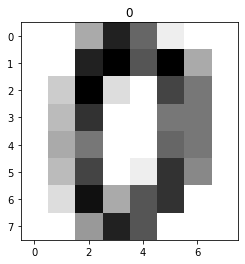

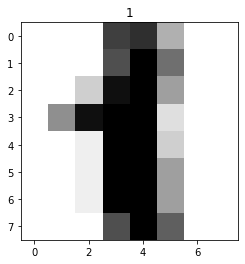

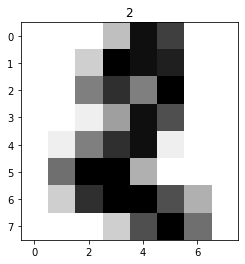

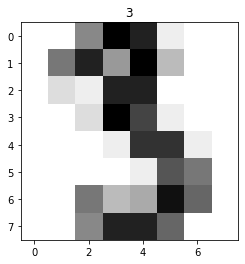

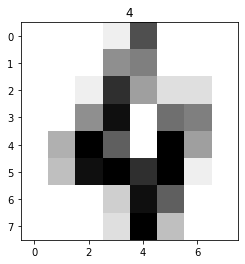

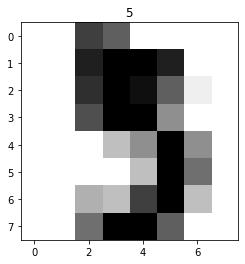

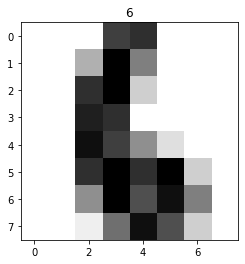

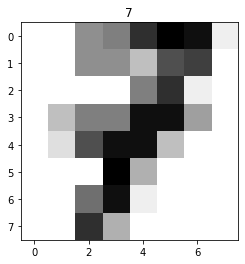

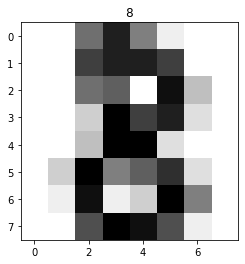

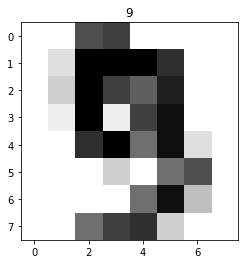

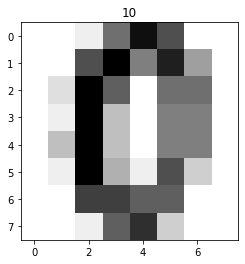

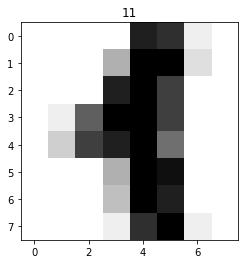

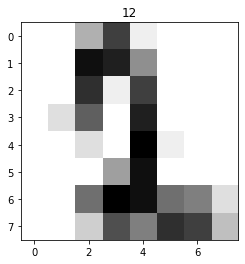

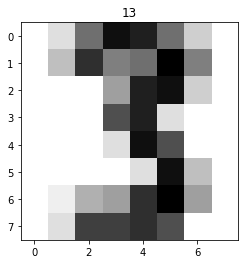

In [8]:
for i in range(14):
    plt.imshow(df.loc[i].drop('target').values.reshape(8,8), cmap='gray_r')
    plt.title(i)
    plt.show()

In [9]:
pixel_features = digits.feature_names

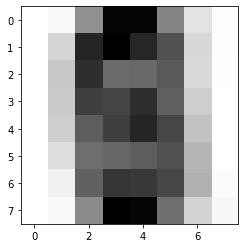

In [10]:
plt.imshow(df[pixel_features].mean().values.reshape(8,8), cmap='gray_r')

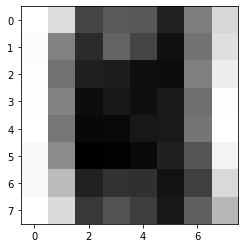

In [11]:
plt.imshow(df[pixel_features].std().values.reshape(8,8), cmap='gray_r')

### PCA

In [12]:
from sklearn.decomposition import PCA

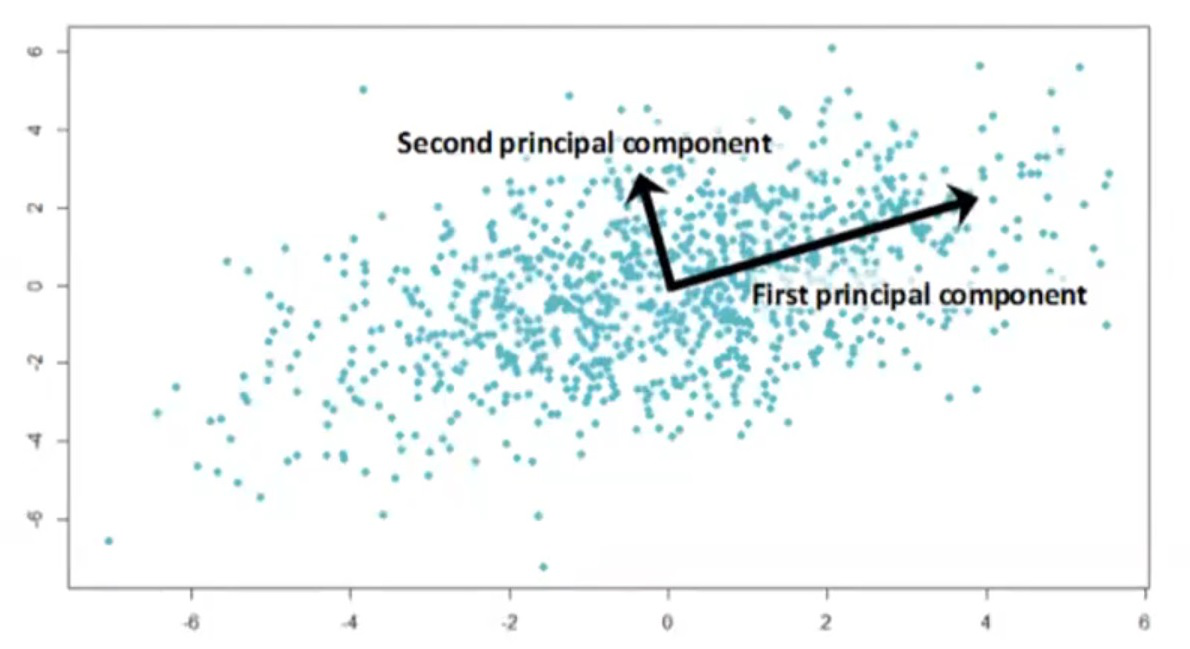

In [14]:
from PIL import Image
from IPython.display import display

image = Image.open('pca_2d.jpg')
display(image)

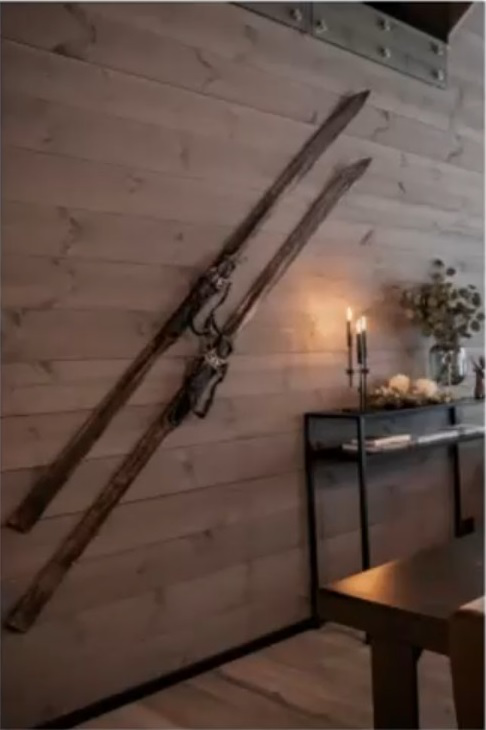

In [17]:
image = Image.open('pca_3d.jpg')
display(image)

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2,random_state=42)

In [17]:
bemeno_valtozok=list(df.columns)[:64]

In [ ]:
df['pca_1']=0
df['pca_2']=0

In [20]:
df[['pca_1','pca_2']]=pca.fit_transform(df[bemeno_valtozok])

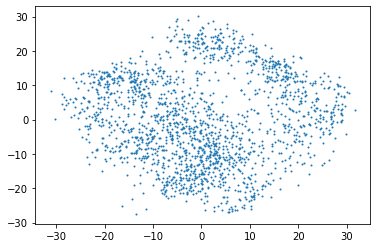

In [24]:
plt.scatter(df['pca_1'],df['pca_2'],s=1)

In [27]:
#plt.scatter(df['pixel_2_3'],df['pixel_4_5'],s=1)

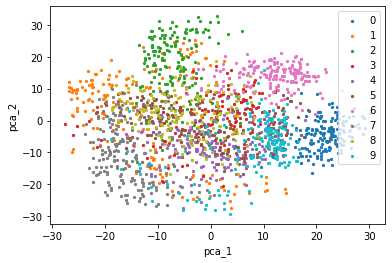

In [57]:
def dim2rajz(df,col1,col2,point_size=5):
    for i in range(10):
        cdf = df[df['target']==i]
        plt.scatter(cdf[col1],cdf[col2],s=point_size,label=str(i))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend(loc='upper right')
    plt.show()
    
dim2rajz(df,'pca_1','pca_2')

In [36]:
pca = PCA(n_components=64,random_state=42)

In [37]:
uj_valtozo=[]
for i in range(64):
    col = "pca_"+str(i)
    df[col]=0
    uj_valtozo.append(col)

In [39]:
df[uj_valtozo]=pca.fit_transform(df[bemeno_valtozok])

In [40]:
# Minifeladat: dobjuk szét kettőbe az adatot, nézzük meg mennyire más a transzformált érték, 
# ha csak a felén fit-eltünk a pca-t

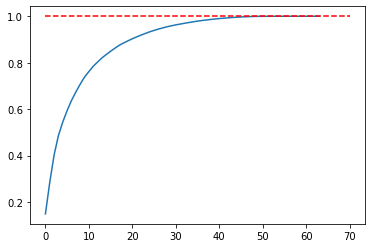

In [46]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.plot([0,70],[1,1],'r--')

In [47]:
len(df.columns)

129

# UMAP

In [49]:
# !pip install umap-learn

In [48]:
from umap import UMAP

In [50]:
mymap = UMAP(random_state=42,n_components=2, n_neighbors=15)

In [51]:
df['umap_1']=0
df['umap_2']=0

In [52]:
df[['umap_1','umap_2']]=mymap.fit_transform(df[bemeno_valtozok])

/opt/conda/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


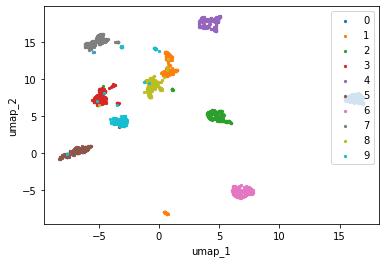

In [58]:
dim2rajz(df,'umap_1','umap_2')

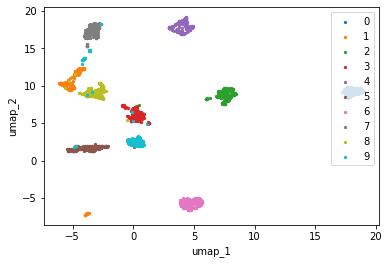

In [138]:
mdf=df.iloc[:-10,:].copy()
mdf[['umap_1','umap_2']]=mymap.fit_transform(mdf[bemeno_valtozok])
dim2rajz(mdf,'umap_1','umap_2')

In [139]:
df[['umap_1','umap_2']]=mymap.transform(df[bemeno_valtozok])

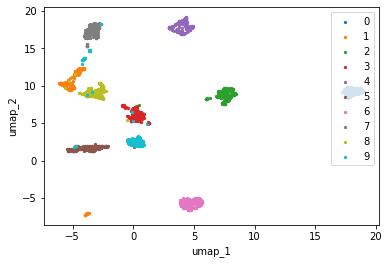

In [140]:
dim2rajz(mdf,'umap_1','umap_2')

In [59]:
egyesek = df[df['target']==1]

In [62]:
egyesek[ egyesek['umap_2']==egyesek['umap_2'].max() ]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,umap_1,umap_2
1495,0.0,0.0,0.0,0.0,6.0,16.0,7.0,0.0,0.0,1.0,...,0.009117,-0.031123,0.015573,0.000465,0.002873,-2.669208e-16,2.066668e-16,-2.277428e-16,0.581783,13.650033


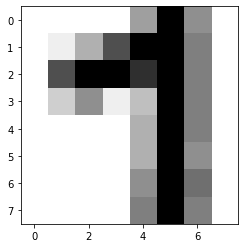

In [66]:
plt.imshow(df.iloc[1495,:64].values.reshape([8,8]),cmap='gray_r')

In [67]:
egyesek[ egyesek['umap_2']==egyesek['umap_2'].min() ]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,umap_1,umap_2
623,0.0,0.0,0.0,13.0,12.0,0.0,0.0,0.0,0.0,0.0,...,-0.007,-0.022143,0.004931,0.002388,0.003679,-3.685107e-17,4.305023e-17,1.073264e-16,0.714759,-8.257817


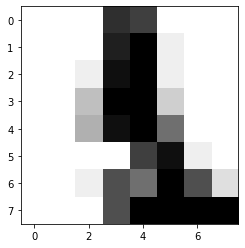

In [68]:
plt.imshow(df.iloc[623,:64].values.reshape([8,8]),cmap='gray_r')

In [69]:
egyesek= egyesek[ egyesek['umap_2']>0 ]
egyesek[ egyesek['umap_2']==egyesek['umap_2'].min() ]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,umap_1,umap_2
1117,0.0,0.0,13.0,14.0,10.0,2.0,0.0,0.0,0.0,0.0,...,0.000148,0.012899,0.004808,-0.005769,0.003577,4.868233e-17,-1.907232e-16,4.382976e-17,0.55507,10.427398


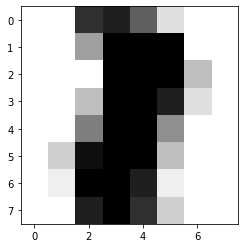

In [70]:
plt.imshow(df.iloc[1117,:64].values.reshape([8,8]),cmap='gray_r')

In [71]:
kilencesek = df[df['target']==9]

In [72]:
kilencesek[ kilencesek['umap_1']==kilencesek['umap_1'].min() ]

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,umap_1,umap_2
1662,0.0,0.0,7.0,15.0,16.0,12.0,0.0,0.0,0.0,12.0,...,-0.128944,-0.027516,-0.000482,-0.007772,-0.003314,-5.708139e-16,1.617750e-17,4.881868e-17,-7.670221,-0.166259


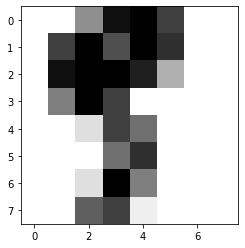

In [73]:
plt.imshow(df.iloc[1662,:64].values.reshape([8,8]),cmap='gray_r')

# Klaszterezés

In [74]:
from sklearn.cluster import KMeans

In [75]:
x=24
kmeans = KMeans(random_state=42, n_clusters=x)

In [78]:
uj_valtozok=[]
for i in range(24):
    col = "cluster_"+str(i)
    df[col]=0
    uj_valtozok.append(col)

In [80]:
df.loc[:,uj_valtozok]=kmeans.fit_transform(df[bemeno_valtozok])

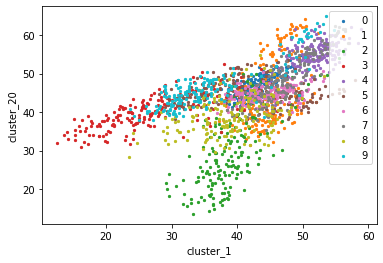

In [83]:
dim2rajz(df,'cluster_1','cluster_20')

# Aritmetikai változók

- MOst hogyan korrelálnak a változóink egy célváltozóval

In [84]:
celdigit = 8

In [85]:
df['target2']=df['target'].apply(lambda x: 1 if x==celdigit else 0)

In [86]:
df['target2'].mean()

0.09682804674457429

In [91]:
cols=list(df.columns)

In [92]:
cols.remove("target")

In [93]:
cols.remove("target2")

In [99]:
df['pixel_0_0'].std()

0.0

In [108]:
corrlist = []
for c in cols:
    corr=np.corrcoef(df['target2'],df[c])[0,1]
    if ~np.isnan(corr):
        corrlist.append(corr)
    if abs(corr)>0.3:
        print(c,corr)

pca_7 -0.33346155709067743
pca_10 0.3198203161091356
cluster_2 -0.5120064119852126
cluster_8 -0.4692628035167432
cluster_15 -0.43697773715372973


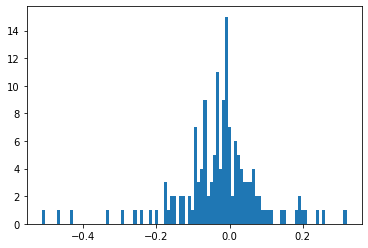

In [107]:
_=plt.hist(corrlist,bins=100)

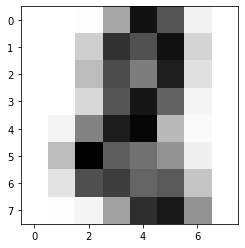

In [114]:
plt.imshow(kmeans.cluster_centers_[15].reshape([8,8]),cmap='gray_r')

In [119]:
for c1 in cols:
    for c2 in cols:
        if c1>=c2:
            continue
        corr=np.corrcoef(df[c1]*df[c2],df['target2'])[0,1]
        if abs(corr)>0.4:
            print(c1,"*",c2,"->",corr)
            df[c1+"_*_"+c2]=df[c1]*df[c2]

pixel_2_5 * pixel_4_3 -> 0.4271606953092761
pixel_3_3 * pixel_5_2 -> 0.4048936262024898
pixel_3_4 * pixel_5_2 -> 0.40618669681226616
pixel_4_3 * pixel_6_2 -> 0.4030148762016248
pca_10 * pixel_5_2 -> 0.44586724728760846
pca_10 * pixel_6_2 -> 0.4540879048073217
cluster_2 * cluster_7 -> -0.42616406361125747
cluster_2 * cluster_8 -> -0.5498162444034916
cluster_2 * cluster_23 -> -0.4357211162450287
cluster_10 * cluster_8 -> -0.4313557623963524
cluster_15 * cluster_2 -> -0.5181577102420948
cluster_15 * cluster_8 -> -0.5126833403409569


In [123]:
for c1 in cols:
    for c2 in cols:
        if c1>=c2:
            continue
        corr=np.corrcoef(df[c1]+df[c2],df['target2'])[0,1]
        if abs(corr)>0.55:
            print(c1,"+",c2,"->",corr)
            df[c1+"_+_"+c2]=df[c1]+df[c2]

cluster_2 + cluster_8 -> -0.5978257664477945
cluster_15 + cluster_8 -> -0.5532490352390946


In [124]:
len(df.columns)

170

In [126]:
# t-SNE

In [127]:
from sklearn.manifold import TSNE

In [128]:
tsne = TSNE(random_state=42,n_components=2)

In [129]:
df['tsne_1']=0
df['tsne_2']=0

In [130]:
df[['tsne_1','tsne_2']]=tsne.fit_transform(df[bemeno_valtozok])

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


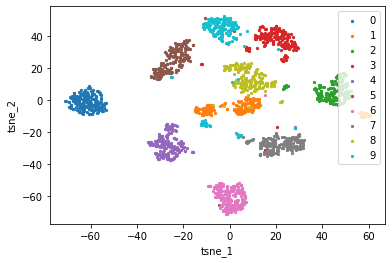

In [131]:
dim2rajz(df,'tsne_1','tsne_2')

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


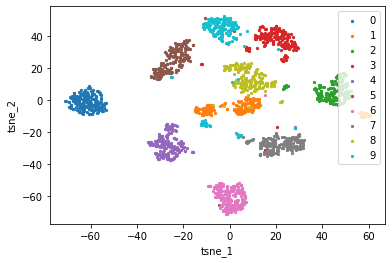

In [134]:
mdf = df.copy()
mdf[['tsne_1','tsne_2']]=tsne.fit_transform(mdf[bemeno_valtozok])
dim2rajz(mdf,'tsne_1','tsne_2')

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


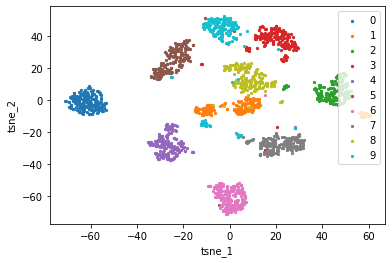

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


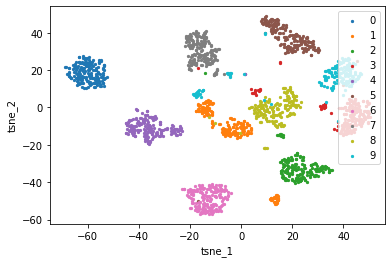

In [136]:
mdf = df.copy()
mdf[['tsne_1','tsne_2']]=tsne.fit_transform(mdf[bemeno_valtozok])
dim2rajz(mdf,'tsne_1','tsne_2')
mdf = df.iloc[:-10,:].copy()
mdf[['tsne_1','tsne_2']]=tsne.fit_transform(mdf[bemeno_valtozok])
dim2rajz(mdf,'tsne_1','tsne_2')

In [137]:
len(df)

1797